In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [354]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences

In [355]:
data=pd.read_csv('C:/Users/Kavya/Desktop/chrome_reviews.csv')
data

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,19-12-2020,com.android.chrome
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,19-12-2020,com.android.chrome
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,19-12-2020,com.android.chrome
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,19-12-2020,com.android.chrome
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,19-12-2020,com.android.chrome
...,...,...,...,...,...,...,...,...,...,...
7199,684987,https://play.google.com/store/apps/details?id=...,Bagusss..,5,0,boima panjaitan,NaN,88.0.4324.93,05-03-2021,com.android.chrome
7200,684988,https://play.google.com/store/apps/details?id=...,Bad version 😔,1,0,निशान्त सिंह,NaN,88.0.4324.181,05-03-2021,com.android.chrome
7201,684989,https://play.google.com/store/apps/details?id=...,One thing that I have to say I can't spelled t...,5,0,Virgie Allen,NaN,89.0.4389.72,05-03-2021,com.android.chrome
7202,684990,https://play.google.com/store/apps/details?id=...,Excellent,5,0,Kazuo Guevarra,NaN,89.0.4389.72,05-03-2021,com.android.chrome


In [356]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7204 entries, 0 to 7203
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               7204 non-null   int64 
 1   Review URL       7204 non-null   object
 2   Text             7203 non-null   object
 3   Star             7204 non-null   int64 
 4   Thumbs Up        7204 non-null   int64 
 5   User Name        7204 non-null   object
 6   Developer Reply  95 non-null     object
 7   Version          7119 non-null   object
 8   Review Date      7204 non-null   object
 9   App ID           7204 non-null   object
dtypes: int64(3), object(7)
memory usage: 562.9+ KB


In [357]:
data.columns

Index(['ID', 'Review URL', 'Text', 'Star', 'Thumbs Up', 'User Name',
       'Developer Reply', 'Version', 'Review Date', 'App ID'],
      dtype='object')

In [358]:
data.describe()

,ID,Star,Thumbs Up
count,7204.000000,7204.000000,7204.000000
mean,252654.665047,3.592726,1.216685
std,204647.596623,1.728362,41.382835
min,3886.000000,1.000000,0.000000
25%,83254.750000,1.000000,0.000000
50%,181866.500000,5.000000,0.000000
75%,419485.250000,5.000000,0.000000
max,684991.000000,5.000000,2389.000000


In [359]:
data.shape

(7204, 10)

In [360]:
data.isnull().sum()

ID                    0
Review URL            0
Text                  1
Star                  0
Thumbs Up             0
User Name             0
Developer Reply    7109
Version              85
Review Date           0
App ID                0
dtype: int64

In [361]:
data.Version.isnull().sum()

85

In [362]:
def fun1(data,var):
    de = data[var].mode()[0]
    data[var].fillna(de,inplace=True)
    
fun1(data,'Version')

In [363]:
data.Version.isnull().sum()

0

In [364]:
data.isnull().sum()

ID                    0
Review URL            0
Text                  1
Star                  0
Thumbs Up             0
User Name             0
Developer Reply    7109
Version               0
Review Date           0
App ID                0
dtype: int64

In [365]:
data.Text.isnull().sum()

1

In [366]:
def fun2(data,var):
    de = data[var].mode()[0]
    data[var].fillna(de,inplace=True)
    
fun2(data,'Text')

In [367]:
data.Text.isnull().sum()

0

In [368]:
data.isnull().sum()

ID                    0
Review URL            0
Text                  0
Star                  0
Thumbs Up             0
User Name             0
Developer Reply    7109
Version               0
Review Date           0
App ID                0
dtype: int64

In [369]:
data.drop(['Developer Reply'],axis=1,inplace=True)

In [370]:
data.isnull().sum()

ID             0
Review URL     0
Text           0
Star           0
Thumbs Up      0
User Name      0
Version        0
Review Date    0
App ID         0
dtype: int64

In [371]:
import seaborn as sn

<AxesSubplot:xlabel='Star', ylabel='count'>

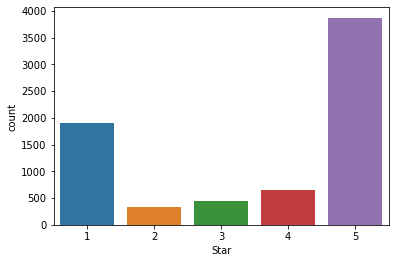

In [372]:
sn.countplot(x='Star',data=data)

In [373]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

In [374]:
one_Star=data.loc[data['Star']==1].reset_index(drop=True)
one_Star.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Version,Review Date,App ID
0,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,85.0.4183.127,19-12-2020,com.android.chrome
1,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,87.0.4280.66,19-12-2020,com.android.chrome
2,3894,https://play.google.com/store/apps/details?id=...,Very bad app 😞,1,0,Akshat Bhardwaj,78.0.3904.96,19-12-2020,com.android.chrome
3,3895,https://play.google.com/store/apps/details?id=...,Many times I tried to update its not updating....,1,0,Aditi Rathor,86.0.4240.198,19-12-2020,com.android.chrome
4,3898,https://play.google.com/store/apps/details?id=...,App is not getting update and it is not gettin...,1,0,Daksh Gulati,83.0.4103.106,19-12-2020,com.android.chrome


In [375]:
two_star=data.loc[data['Star']==2].reset_index(drop=True)
two_star.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Version,Review Date,App ID
0,3966,https://play.google.com/store/apps/details?id=...,I am facing a serious problem with my Google C...,2,0,Parvez Hussain,83.0.4103.101,19-12-2020,com.android.chrome
1,4088,https://play.google.com/store/apps/details?id=...,Fact and simple browse,2,0,Alex Lara,86.0.4240.99,21-12-2020,com.android.chrome
2,4095,https://play.google.com/store/apps/details?id=...,"It's updated, but the request is still saying ...",2,0,Lin Wise,87.0.4280.66,21-12-2020,com.android.chrome
3,4097,https://play.google.com/store/apps/details?id=...,"@ s,for xzznrbx v u #z,, $7*.""7 :87 ,x' , ÷÷÷=...",2,0,Hlayiseka Hlungwani,40.0.2214.109,21-12-2020,com.android.chrome
4,4101,https://play.google.com/store/apps/details?id=...,Claiming certificates on our intranet are inva...,2,0,Geofferey Eakins,87.0.4280.101,21-12-2020,com.android.chrome


In [376]:
three_star=data.loc[data['Star']==3].reset_index(drop=True)
three_star.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Version,Review Date,App ID
0,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,85.0.4183.127,19-12-2020,com.android.chrome
1,3903,https://play.google.com/store/apps/details?id=...,Low download speed,3,0,omid rostami,87.0.4280.101,19-12-2020,com.android.chrome
2,3929,https://play.google.com/store/apps/details?id=...,Can't update on Huawei Mate 20X..,3,0,abu kasim,87.0.4280.101,19-12-2020,com.android.chrome
3,3930,https://play.google.com/store/apps/details?id=...,I have problem with that whenever I go to any ...,3,0,Subham Raj,87.0.4280.101,19-12-2020,com.android.chrome
4,3953,https://play.google.com/store/apps/details?id=...,It always recommend me new apps to install . P...,3,0,creative videos,84.0.4147.105,19-12-2020,com.android.chrome


In [377]:
four_star=data.loc[data['Star']==4].reset_index(drop=True)
four_star.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Version,Review Date,App ID
0,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,77.0.3865.116,19-12-2020,com.android.chrome
1,3891,https://play.google.com/store/apps/details?id=...,This app good,4,0,Akash More,83.0.4103.101,19-12-2020,com.android.chrome
2,3904,https://play.google.com/store/apps/details?id=...,Suuper,4,0,Suresh Ramya,85.0.4183.127,19-12-2020,com.android.chrome
3,3907,https://play.google.com/store/apps/details?id=...,Best,4,0,Supriya. kumari Ghailarh Madhepura,84.0.4147.125,19-12-2020,com.android.chrome
4,3912,https://play.google.com/store/apps/details?id=...,Ok,4,0,V v rao Vasabakthula,87.0.4280.101,19-12-2020,com.android.chrome


In [378]:
five_star=data.loc[data['Star']==5].reset_index(drop=True)
five_star.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Version,Review Date,App ID
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,83.0.4103.106,19-12-2020,com.android.chrome
1,3892,https://play.google.com/store/apps/details?id=...,Yes yes,5,0,Leslie Harrison,87.0.4280.101,19-12-2020,com.android.chrome
2,3893,https://play.google.com/store/apps/details?id=...,Awesome,5,0,Monish Sangani,85.0.4183.127,19-12-2020,com.android.chrome
3,3896,https://play.google.com/store/apps/details?id=...,Good,5,0,Sujot Patel,86.0.4240.99,19-12-2020,com.android.chrome
4,3897,https://play.google.com/store/apps/details?id=...,Very good app,5,0,Ghasiram Sa,86.0.4240.198,19-12-2020,com.android.chrome


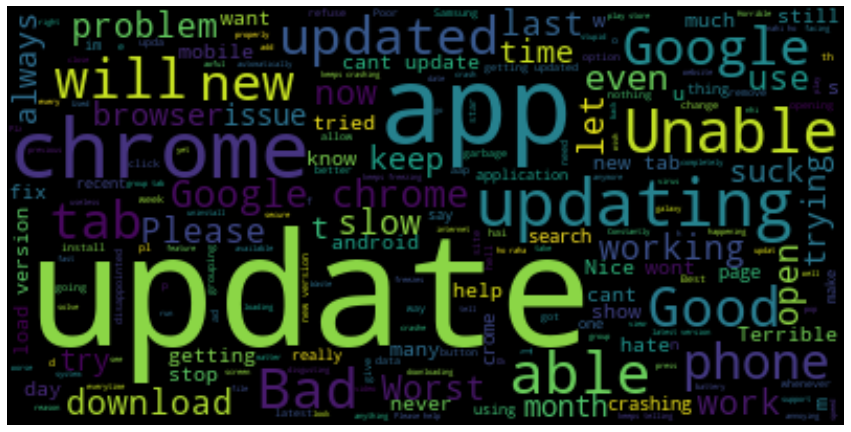

In [379]:
Text=one_Star['Text'].to_string()
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(Text)
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

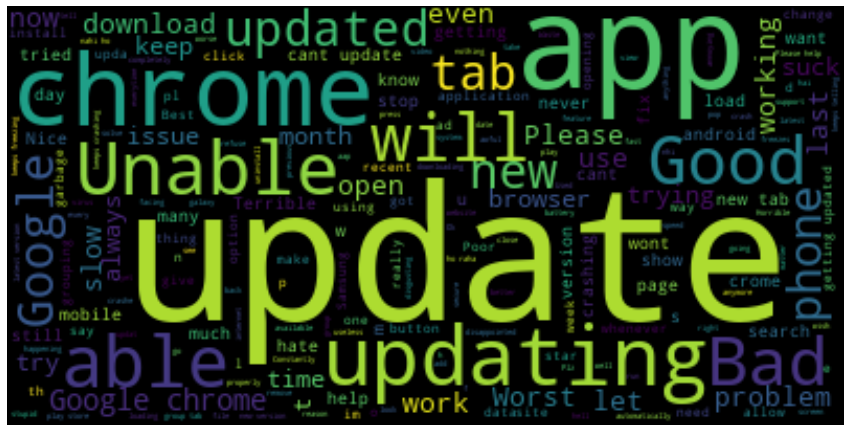

In [380]:
text=two_star['Text'].to_string()
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(Text)
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

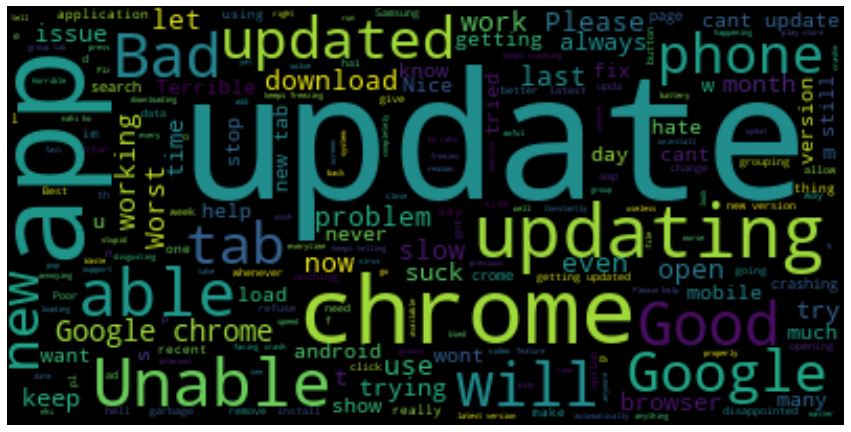

In [381]:
text=five_star['Text'].to_string()
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(Text)
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [382]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [383]:
text=data['Text']
text

0                              This is very helpfull aap.
1                                                    Good
2          Not able to update. Neither able to uninstall.
3                                                Nice app
4                                       Many unwanted ads
                              ...                        
7199                                            Bagusss..
7200                                        Bad version 😔
7201    One thing that I have to say I can't spelled t...
7202                                            Excellent
7203    After update it lag and always slow same goes ...
Name: Text, Length: 7204, dtype: object

In [384]:
X=[]
for i in data['Text']:
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    words= tokenizer.tokenize(i)
    words=[i for i in words if i not in stop_words]
    words=[i .lower() for i in words]
    words=[i for i in words if i.isalpha()]
    words=[lemma.lemmatize(i) for i in words]
    X.append(' '.join(words))

In [385]:
X

['this helpfull aap',
 'good',
 'not able update neither able uninstall',
 'nice app',
 'many unwanted ad',
 'this app good',
 'yes yes',
 'awesome',
 'very bad app',
 'many time i tried update updating and whenever i try use app freeze go back home',
 'good',
 'very good app',
 'app getting update getting open saying u r using old version plz update updating',
 'mostly useful',
 'everything ia possible chrome like',
 'very coming real status thank',
 'good',
 'low download speed',
 'suuper',
 'i want download greana free fire comming file',
 'good news etc',
 'best',
 'good',
 'mydeviceshavebeenhacked im humble christian know knowing hard need tell know two face hard take i hear trying lie much world even online hide true trying get life without threat everything know story truth call car tel rick desiree come see im done keep posting r',
 'awesome browser',
 'rait crom',
 'ok',
 'continual awe snap fix',
 'move download use',
 'best fastest',
 'data consuming',
 'my phone samsung i u

In [386]:
le=WordNetLemmatizer()

In [387]:
corpus=[]

In [388]:
for i in range(len(text)):
    review=re.sub('[^a-zA-Z]',' ',text[i])
    review=review.lower().split()
    review=[le.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review=' '.join(review)
    print(review)
    corpus.append(review)

helpfull aap
good
able update neither able uninstall
nice app
many unwanted ad
app good
yes yes
awesome
bad app
many time tried update updating whenever try use app freeze go back home
good
good app
app getting update getting open saying u r using old version plz update updating
mostly useful
everything ia possible chrome like
coming real status thank
good
low download speed
suuper
want download greana free fire comming file
good news etc
best
good
mydeviceshavebeenhacked im humble christian know knowing hard need tell know two face hard take hear trying lie much world even online hide true trying get life without threat everything know story truth call car tel rick desiree come see im done keep posting r
awesome browser
rait crom
ok
continual awe snap fix
move download use
best fastest
data consuming
phone samsung update app
lag day worst even update even update
good app like every us
bad
nice app
mast xnxx
unable update google chrome app playstore
attractive
download manager garbage 

download failed modzilla firefox begin point stopped request google chrome
chorme best without permission opening web site playing game like opening website using whatsapp opening power showing please fix giving update
amezing
suppepp
video camera
good performance
drew
crome crashing updating though updated version

good
useful world people best result android
able update chrome
top site good
yeah
able update
crome update time tried many time could update google crome
update chrome know prblm anyone solution regarding plss let know
good
love
update galaxy
good app esmese jo maerge labe sakte waooo
best
chrome updating playstore soon click update showing update button enabled updating browser
good google search
updating
good
good use
best app
unable update
love itthe best everp leasedl wnload
nice
wow could good watching po n hub
ghoul
really good fast secure
good
dissatisfied
pop
display get warmer yellowish tone oneplus pro scrolling website chrome white background please fix issue
up

great application
good
nice
good app
always crashing
excellent
help love
cool cool
kelejeje
nice
odreneree going happen oder well fact president ajith sir ajith girl side world world
amazing
super
good
nice
good
bbakit sha update nga yon
able update chrome browser updated available update
super
update rog phone
interested
good every time try answer phone something pop trouble answering phone
great
approved
good
making download anything
app good use regular
open blank screen
crash respond
good one
getting updating plz check
good jwstream assembly important plea
nice
keep crashing
best app ever
able update let take bit quick update mean play store
stuck like happening going opening open happening day
ok
update apps
update version
ok
best experianced app life love
nice
best
fast give result accurately
keep telling update freeze
good
bad aplication
google admin repeatedly kept changing google language ukrainian w permission punishment posting joe corleone biden crime family rendering chrom

nice application
cannot download video file

ok
change community guildlines
officially garbage mess bigger get worse app get
google best come web navigation privacy user
excellent stuff
update click update blink required update
new update load
good browser worldwide googlechrome
chrome file big slows everything
update uninstall
chrome keep telling update update tap update go back screen
definitely steal data
good app
update app even say need one going month
good searching updating installing
keep glitching page keep freezing chrome app need fixed right away updated well useless app worth time please fix glitch updated lucky pepole got star rating want star fix app
omnii ellekhem zenomn
work great standing right router
good
data conect
hi google xiaomi note cant seem update cn help
extremely good
great
update matter
nice
browser lost partly year hassle fought hard clear cloud photo gallery rated stuff returned hacker false certificate chrome sends hacker website unlike firefox duck lear

good fantastic
ok
poor
lovly
dog gone app even update tell nothing problem could give zero star thats app deserves even read comment try fix bug grr
good
bagus apps ini
good job
use need information
good
cant update chrome click update button nothing happen
great
easy follow direction
faster
great
keep crashing

many add came
update install
hi happy use
app show update update last six month android one phone v today factory data reset also unable update
update apk disgusting
supr
sure
able update
good
good apps
far online ok google chrome forgotten every password every device carrier robert jai kreczmer created two year causeing system eraseing everything hold identity
nice
solid performance past year
update say need crash often everyone lamesauce
good happy new year god bless amen
hey yall suck always crashing always freezing boo
app working perfectly coulndt load blank page
cant update fix
please bring back previous interface new tab interface sooooo confusing link webpage image like

new version update problem update andriod phone please solve problem immediately
good top search engine
hate
quit installing apps tablet
astronomically hilarious
interesting
awesome update even though notified need updated tried time please fix
app crash please fixed
black screen cannot use use get job fix soon
guy wrong page called cinecalidad think chrome letting able use please help
super app sometimes working sexual relationship social medium hot looking parent talking new people support word first time make chatroom apps enjoyment new friend life chatting life chatroom
supper app
z
sure going app update samsung galaxy anyone else problem
excellent
loaded
bad app update
nice
lady lesbian luvleen ash
good
used enough honestly rate need time
app update google phone google browser google sw update fails anyway
best fast service encountered
great
problem
samsung tab ran previous version chrome fine upgraded frequently reminded version frequently crash option roll back previous version


good app
google product among work creator need day life love love
chrome updating

good
man update mobile chrome mobile show update click update option start processing sec stop problem man note mobile brand new poco x tell problem mobile
one excellent app used ever
update related problem
good
updated min keep crashing freeze startup able thing show internet connection issue side getting continuous email please fix
best search app ever seen
show desired result
good app
letting update app everything date phone absolutely ridiculous
since last update app working please help
awaaw little wa wwaeaa wa awaaaaa aw
date time time
fast ever
polichu
mostly tablet ok
nice
good nice
keep asking update google chrome try allow
good
good application good job google
accessed apps game library specifically see whether missed update know going lot issue browser new week beginning think needed new tablet please fix issue
best
best app ever
try update never get updated
able update google chrome know pro

unable update chrome
u ct
nice app saying ke ap sab log use kar ra ka roo
crach lot time
update
developed different type use
nice
good
bit slow g phone
chrome still updating system view update
problem updating app
good
neat
good
please update chrome
good
spr
love
able update google chrome
app ok
possible stay single day without google
able update app
good
great app
criminal enterprise run communist
fmmmmmmmmmmmmmmmmmmmmmmmmmmmmgg mmf h
vvi app
mobile good enough use mean running mobile properly given star
addisriport
great app
take forever download update
good
best
taking update
dowload video restart half full
censoring people company agree politically wrong
superb
bakwas net
good
really dont understand app never trouble
really secure
whaaa
app update
updated
reat
best browser
cant update please fixvit
update available possible update mi note pro
nice
use
good
exellent
nice creation google
good
pathetic
super
app refuse update shuts use
great
nice
good


goog cute
expected
ok bad
alway

fast love
slow
good
bad app especially
b fell p k cac f jhn b friendvht fn koly b canv oh cool blb
like
cant load even updating
good
vijendra
say much faster reliable
good
issue opening data scroll bar whip across time open showing data twice unnecessary distraction turn tablet get data mobile data activated bamm edit even issue ignore issue unable update chrome trying past day
ferfected
ok better
fantastic
app fast
bobo nyo
fine one

slow
play video twitter unless full screen
good
please dont send message
chrome app update please help
excellent
lot good apps available

nice
good
lame
update
nice app
cannot ass google app
nice
nazi use chrome
good

update issue
best web browser
trying update one plus mobile bt updating know please solve soon
chrome update
good one browsed many thing know helped lot time difficult use
good
ok
good
problem updating app one plus nord
super
peace queen size v vvvvnkvhg
best internet comfortable using thing discourage advertisement best among familiar
perfe

must delete space apps delete
excellent
ooo
sign injennifersadler
useful app
vood
nice
app acting cant use
ok
good
padi
good
constantly update like say forever nice
great app
good job
opon
google better
nice
update showing update help
good app
best
update chrome
excellent
able update
nice understandable
nokyki
update
update
like
good app
fast
trying update chrome since last two month getting updated wht
nice
great
yashpatel
great app
good app
ok
annoying thing tab group confusing pls keep thing simple way better earlier
update app
bad apk slow
best service
work
unable update google chrome since last month know whats wrong still required update could tap update button loading stopped got solution resolve issue social medium friend anyone help grateful
unsure

superb bro
nice
notification update seems like let whenever press update nothing happened think problem part since could update apps fine
exlent
best apps
go
mera crome update nahi ho raha hai mera crome update q nahi ho raha hai
l

make navigation bar look gray even watch video thing keep bothering updated chrome new version please make navigation bar black
best
rw frffxddrrfrer e ew r eeder e mail tttt
awesome
unable update app via play store
good
ritendra
going update last month check problem first
app getting update
fast useful educational shopping game
good
updating
waste keep crashing
ok good
lovely
good
awesome
update
thank
love chrome chrome life chrome bae
nice
problem app issue start time video see time l know sim problem wrong l known new sim thin see please solve problem l think l well delete
nice
google chrome suck setting inoperable unmanageable reflect opposite despite wish sync available option managed policy act without confirmation denying fml please make stop
like fast
ok
john zakaria
able update long always getting error update app become slow

lalbabu
good
app refuse update try force update cancel update need start using another browser hopefully get fixed soon
nice app
bad
go everything
saju


g
dont app cell would like
good
nice aap
aibo im robbed ever making update robing trying update app guess st time stoped downloading started reached continued download aibo data people ahh man love app dont make switch
gps good work

good
cool
good
trouble updating app update button working still reply google
great feature
like app
update available
lnd
nice
download
ok
nice
want grow account
jl
dops dops
able update please check advice even still pleoblem going
slow often doesnt load
good
u u assured b
awesome app google
update keep freezing phone someone messed big time
excellent app
ok
app update neither browser play store tried remedy uninstal given even older vunerable browser update new retro feature ive heard yet
trash bad ui update
good
new update force tab group even disabling turn back perfectly capable making damn tab decision need
best
able update crome browser already showing update every time want update crashed
thanks
thought new way displaying open tab good idea terrible

cant update chrome
supper
update click update update
good great useful thanks

nice
nice
good happy
amazing
new button layout unproductive

facebook
update matter like download update
good
app good
able update chrome
doo update suck
good
good
spam virus
update disappointed
google steal
update problem
gfdhdgxhx hi thinking
facebook lite
improve needed

nice
done
good
bien
release upgrade google watch update chromium
good experience
nice
never update
poor application
good
bekar
great
unable update app since long time hell wrong update option get cancelled whenever try mean ridiculus
better
good
se easy
good
wrost app
ok
nic
faster
good
cannot get new update even update
denied access unable update chrome app
excellent
like new update
like
system utility keep telling app consuming much battery power
best
democrat geeez
effective
able update
unable update app
bad
love app tell time update apps
wow
love
super
super
good app
update wise star specific problem occurs device
valo
chutar
good
upd

update automatically manually tried every way also noticed lately browser slow many image appear perhaps update would fix except well itv went update
browser taking update update app
awsome
good service

best
great browser
muzfar


mazing aap
good
good
nice helpful
good
whenever tap update button app start update
best
love app use time oline really fast complacations
facing issue like update browser playstore see update list playstore showing error finding update went microsoft edge resolved adapting edge shift back chrome orelse bad
worst experience updated
new tab system annoying please enable duet chrome tab please also please stop changing ui
nice
cool application
nirv
good app need rate star
simple smooth
sock
nice
nice app
ok good

device redmi note pro update show update
show adult picture aap wana search somting show adult picture show wana post social medium
ok
star
could update reason using
able update google chrome
best best
awesome
gd
new update frustrating please bring bac

beast app beacaus see ani thing ani information
good app thanks
n
great
good
good night
awesome job happy
unable listen downloaded song continuesly
ok
good
app updated phn

sense zte blade pure hell worst phone know verizon stuck every hour rebooting trashy thing wasting time money total reject phone
kaleem
nice
pp pinko
application updating
great
resend type
happy
good
update chrome
v gd
nice

good night
update chrome many time tried remain update
say need update wont let
shahida akter sanjida
look mo pmo pmol p p lo nm mk icicolll de pllll lo check j oooooll l iu l many p mk na uu l li l mii keep k ii f momd ikkkkmmimm idol moment oi mkm ml n
nice
good
updated happened
updating try time help
good
service modest rate
able update still issue repeated
kuzhappamilla
reply
hang always
good
nice r fear data
really great
improtente
hate show sex
good
like new feature grouping tab useful keep find related reading one place
application updated unless application
l
excellent
update
satisfied
p

work update download
update problem
chrome bestest browser world consumes alot battery afterall budy beat browser
great app
super active
nyc
remove google
gpod
excilent
chrome
turning pathetic browser top performing browser search keep blank page hang time search also somehow able install th feb update every app problem nothing network related
good
english
use problem w chrome even work im disappointed
love browser keep good work
update app
good
time better samsung internet use internet nothing hacker
got update today share function acting weird list message contact apps fix really suck update keep seeing email deleted every time open email chrome used chrome since first came get back fast reliable instead packing glitchy featutes
yaar updated resume
perfect
good
good

chrome updating tried update chrome updating
wonderfull
keep getting threat threw notification saying virus going lock phone soon rude
god understood could cry thank u really need want person entity accessing ability spe

new grid tab display garbage phone print size small old people changeable setting want frustrate senior maybe use samsung native browser came phone default better battery life sort stupid change people update apps
informative app
excellent browser
new update
nice
best app
google chrome always seemed work well one issue extension work give chrome star yet encountered problem using chrome long time
good
hahaha
great
love google chrome
ok
nice
update

nice
esse app e melhor navegador que eu ja vi em toda minha vida estao de parabens o desenvolvedores
good

news feed showing news relevant u india dont see news country news feed recommendation screwed big time
great search browser app love
gif preview google image search broken
bad
awesome
galaxy note plus android update chrome may ask
good
good

new tab update suck
good
good
good
downloading network speed slow
updated app
udaypoweruday
good
gonna update make worst keep show ad
february st update pushed quite garbage convolutes current tab 

update
nice
upgrade since last month
update
chrome good app something bother hold image find say bottom search google lens tap nothing happens even searched google lens app nothing either fix explain nothing happens try use search google lens still give star amazing app
grouped tab phone love squint see used easy flip way turn
unable update
best porn experience
jai hind jai sree ram hindustan ki kasam
nice
byd
good
app simply refused update press update button nothing guess injyst disable use different browser sad live chrome unable update past device give please help thanks


hgu
good
great app
update install please help
grouping feature done terribly miss old layout swiping tab easily instead ultra cautious accidental close one
please put setting tab selection better previous tab open new tab group like
good god bless
excellent
essential service many people
l know remember back mind allegedly fruad chrome delay
bhut bdinya app
good app
good
good
pintu meena good bower
best
chrome gre

new way close open tab annoying
help
good
good none responsive time
nice
wont even install trying install day continuously freeze pretty dissapointing
update time well
whole browser glitching updated glitching showing dirty thing get
super
app cool
best
veerendra singh hansari
raju bhai
use full
nice
good
unable update
good
nice work
best ever
good
great
hate update hard switch tab confusing like tap instead aa purpose chabging tab ugh
must good
good
hacker scammer
awesome
wouldnt even let update play store bug
slowly loading update new version
good
good
bilalalali gmail com
crash
ever since last update crashing often page loading take time
last update ruined app
best
great
u r rocking love u chrome team
wy chrome app crashing load anything close soon mad
hour phone spinning circle msg update pending problem shall stop update try later
fine
awful browser
super
poor experience yet updated
super app
nice app porn video
use anything google chrome
good
really easy use
sloww
good
nice
app r

change tab process back previous one please new tab process terrible n highly inconvenient
one problem browser updated
need help app update phone redmi note
good
chrome cant update

amazing
fahadnazir
one best even better safari
convienent use complaint far
easy hack
new update make whole app completely useless really disappointing please fix really useful app
able update chrome pls help
ever since got notification updating chrome push update button trying update update anyone else problem like come
worst app ever seen life app even get properly open open work think google stop chrome app
awesome
good
since new update wont anything wont even show screen
bad effect slow net updated problem big problem
super
spam
bad app service
nice
nice app
good
bom aplicativo ma
update chrome
supar
pleased
nice
unable update
longer work properly terrible update
group tab suck simple better
better
good
like
nice
new tab group annoying
excellent
good
want ask question mic
much come back unwanted
nice
ap

In [389]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
print(stop_words)

{'here', "isn't", 'other', "couldn't", 'so', 'in', "should've", 'nor', 'yourselves', 'for', 'how', "hadn't", 'while', 'wasn', 'himself', 'what', 'should', 'are', 'any', "needn't", 'did', 'over', 'as', 'have', 'of', 'do', 'an', 'on', 'were', 'them', 'with', 'ain', "shan't", 'but', 'against', 'theirs', 'few', 'where', 'above', 'when', 'hasn', 'was', 'no', 'at', "wouldn't", 'down', 'up', 'this', 'through', 'your', 'into', 'd', 'yours', 'each', 't', 'y', 'why', 'being', 'wouldn', 'she', 'ours', 'again', "you'll", 'isn', 'out', 'and', "hasn't", 'myself', 'he', 'has', 'needn', 'shouldn', 'doesn', 'can', 'been', 'about', 'if', 'weren', 'herself', 'had', 'too', 'those', "didn't", 'him', 'they', 'both', "she's", 'by', 'his', 'which', 'than', 'further', 'before', 'such', 've', "you'd", 's', 'that', "it's", "mustn't", 'll', 'between', 'off', 'under', "you've", "haven't", 'ma', 'most', 'm', "aren't", 'yourself', 'won', "weren't", 'until', "don't", "won't", 'my', 'don', 'below', 'now', 'more', 'mig

In [390]:
data=data.iloc[:,[2,3]]
data.head()

,Text,Star
0,This is very helpfull aap.,5
1,Good,3
2,Not able to update. Neither able to uninstall.,1
3,Nice app,4
4,Many unwanted ads,1


In [391]:
x=data['Text']
y=data['Star']

In [392]:
x.head()

0                        This is very helpfull aap.
1                                              Good
2    Not able to update. Neither able to uninstall.
3                                          Nice app
4                                 Many unwanted ads
Name: Text, dtype: object

In [393]:
y.head()

0    5
1    3
2    1
3    4
4    1
Name: Star, dtype: int64

<AxesSubplot:>

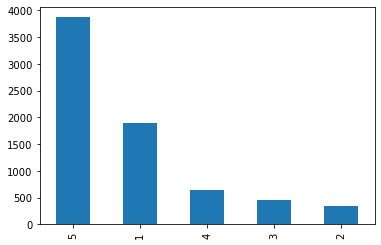

In [394]:
y.value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Star'>

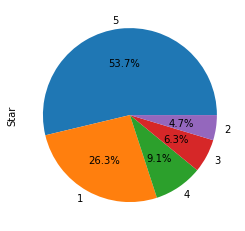

In [395]:
y.value_counts().plot(kind='pie',autopct='%1.1f%%')

<AxesSubplot:ylabel='Star'>

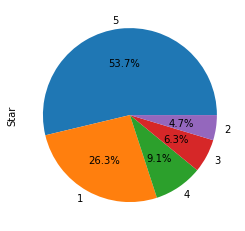

In [396]:
y.value_counts().plot(kind='pie',autopct='%1.1f%%')

In [397]:
vocab_size = 10000
encoded_docs = [one_hot(d, vocab_size) for d in X]
print(encoded_docs)

[[3169, 3534, 5130], [7753], [5547, 1955, 8987, 9846, 1955, 5726], [7566, 1814], [4636, 614, 438], [3169, 1814, 7753], [5656, 5656], [7595], [5102, 3374, 1814], [4636, 586, 9924, 5277, 8987, 6475, 9553, 8828, 9924, 2316, 8444, 1814, 4825, 8891, 6901, 4467], [7753], [5102, 7753, 1814], [1814, 9423, 8987, 9423, 3901, 2315, 6237, 8933, 6189, 5684, 1651, 9042, 8987, 6475], [6482, 7785], [4577, 1750, 4057, 3921, 1810], [5102, 5138, 1756, 5409, 5063], [7753], [5369, 654, 9513], [7147], [9924, 5093, 654, 5514, 710, 6116, 7791, 4157], [7753, 2774, 9649], [6664], [7753], [872, 7440, 7413, 4446, 3337, 2368, 5882, 288, 5895, 3337, 2312, 1781, 5882, 8464, 9924, 768, 846, 2125, 3874, 5237, 9344, 3299, 2172, 1423, 846, 9021, 94, 1442, 2500, 4577, 3337, 9310, 2111, 3537, 2051, 8666, 5925, 2758, 9622, 7237, 7440, 7162, 7946, 4985, 8933], [7595, 1380], [731, 3927], [9135], [1697, 3517, 9176, 9721], [1415, 654, 8444], [6664, 6218], [6338, 6455], [5405, 3625, 5753, 9924, 8987, 1814], [6957, 2441, 463, 72

In [398]:
max_length = 468
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[3169 3534 5130 ...    0    0    0]
 [7753    0    0 ...    0    0    0]
 [5547 1955 8987 ...    0    0    0]
 ...
 [5094 4536 9924 ...    0    0    0]
 [9827    0    0 ...    0    0    0]
 [5266 8987 2441 ...    0    0    0]]


In [399]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator

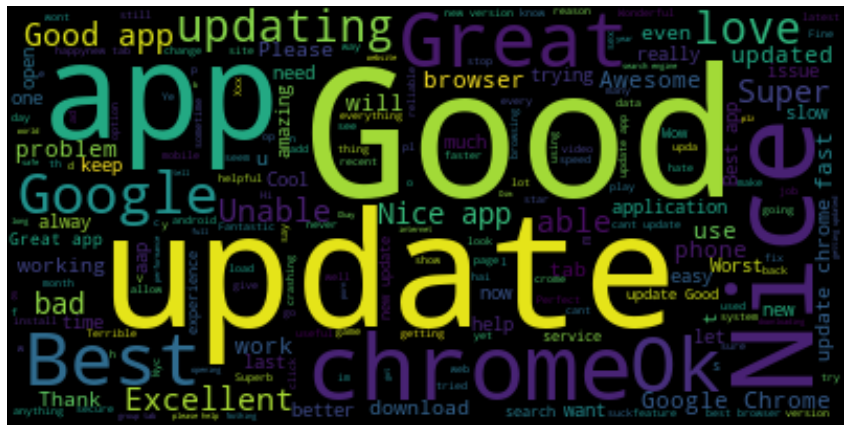

In [400]:
text=data['Text'].to_string()
wordcloud=WordCloud().generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [401]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [426]:
X=np.array(x)
X

array(['this helpfull aap', 'good',
       'not able update neither able uninstall', ...,
       'one thing i say i spelled good i problem try spell best',
       'excellent',
       'after update lag always slow go googleee i want work'],
      dtype='<U466')

In [427]:
Y=np.array(y)
Y

array([5, 3, 1, ..., 5, 5, 1], dtype=int64)

In [428]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [429]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
print(count_vector)

CountVectorizer()


In [430]:
train_data = count_vector.fit_transform(x_train)

test_data = count_vector.transform(x_test)

In [431]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(train_data,y_train)

MultinomialNB()

In [432]:
pred=model.predict(test_data)
pred

array([5, 5, 5, ..., 5, 5, 1], dtype=int64)

In [433]:
y_test

5843    5
2866    4
5831    5
3534    5
2097    5
       ..
3044    3
4912    5
3599    5
5742    5
6162    1
Name: Star, Length: 2162, dtype: int64

In [434]:
model.score(test_data,y_test)

0.7095282146160962

In [435]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[ 470,    1,    0,    0,  100],
       [  65,    1,    1,    0,   32],
       [  57,    0,    0,    0,   80],
       [  32,    0,    0,    1,  158],
       [  99,    1,    2,    0, 1062]], dtype=int64)